Low-dimensional Embedding of Time-varying Connectivity
--

In [2]:
import numpy as np 

import os 
datapath = '/Users/nicolasfarrugia/Documents/recherche/data_mpilmbb/'

from matplotlib import pyplot as plt 

%matplotlib inline

In [3]:
all_sim = np.load(os.path.join(datapath,'FC_variability.npz'))['all_cosine_sim']

In [4]:
all_sim.shape

(40, 572, 572)

In [5]:
from sklearn.manifold import SpectralEmbedding

ncomp= 2 

manif = SpectralEmbedding(n_components=ncomp)

lowdim_fc = np.ndarray((all_sim.shape[0],all_sim.shape[1],ncomp))

for i,cursim in enumerate(all_sim):
    

    lowdim_fc[i] = manif.fit_transform(cursim)

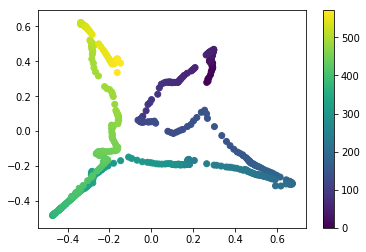

In [6]:
subj = 15

plt.scatter(lowdim_fc[subj,:,0],lowdim_fc[subj,:,1],c=np.arange(lowdim_fc.shape[1]))
plt.colorbar()

Load cluster labels 

In [7]:
centroids = np.load(os.path.join(datapath,"kmeans_results.npz"))['centroids']
clustlabels = np.load(os.path.join(datapath,"kmeans_results.npz"))['labels']

Represent cluster labels on Low dimensional embedding 

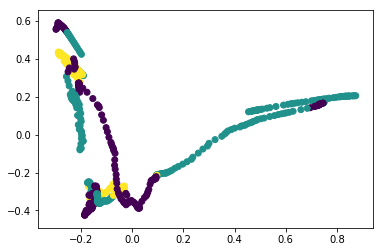

In [9]:
subj = 10

plt.scatter(lowdim_fc[subj,:,0],lowdim_fc[subj,:,1],c=clustlabels[subj])

Add Network Change Point Detection

In [10]:
subj = 22 # Subject 22 doesnt have NCP

permut = np.load(os.path.join(datapath,"NCPD_results.npz"))['permuts']

stat = np.load(os.path.join(datapath,"NCPD_results.npz"))['stat']



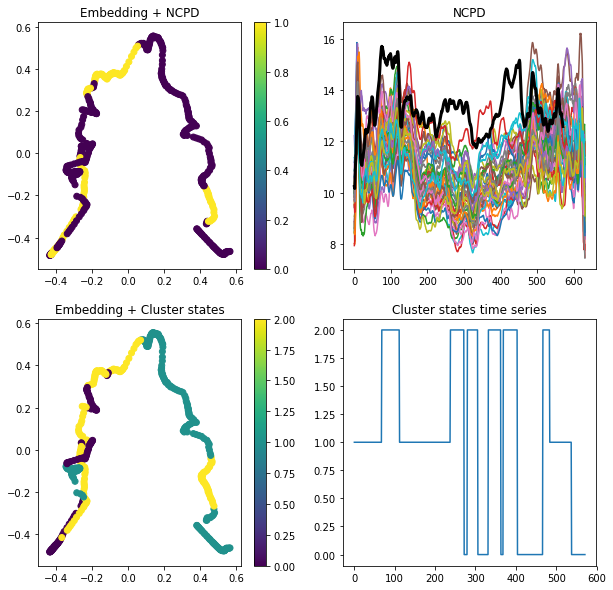

In [11]:
subj = 0

stat = np.load(os.path.join(datapath,"NCPD_results.npz"))['stat']
perms = np.load(os.path.join(datapath,"NCPD_results.npz"))['permuts']

maxofperms = np.max(perms,axis=0)

stat_ncpd = stat[:,:572]

#stat_ncpd[stat_ncpd>=14] = 1
#stat_ncpd[stat_ncpd<14] = 0

plt.figure(figsize=(10,10))
plt.subplot(2,2,1)
plt.scatter(lowdim_fc[subj,:,0],lowdim_fc[subj,:,1],c=stat_ncpd.ravel()>maxofperms[:572])
plt.colorbar()
plt.title('Embedding + NCPD')
plt.subplot(2,2,2)
plt.plot(perms[:40,:].T)
plt.plot(stat_ncpd.ravel(), color='k', linewidth=3)
plt.title('NCPD')
plt.subplot(2,2,3)
plt.scatter(lowdim_fc[subj,:,0],lowdim_fc[subj,:,1],c=clustlabels[subj])
plt.colorbar()
plt.title('Embedding + Cluster states')
plt.subplot(2,2,4)
plt.plot(clustlabels[subj])
plt.title('Cluster states time series')
plt.show()

In [12]:
cor1 = np.load(os.path.join(datapath,"ncpd_states.npz"))['state1']
cor2 = np.load(os.path.join(datapath,"ncpd_states.npz"))['state2']

In [13]:
from nilearn.plotting import plot_matrix

Text(0.5,1,'NCPD 2 ')

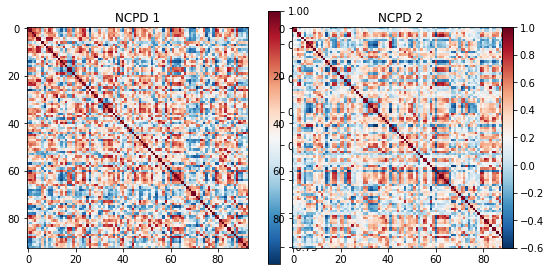

In [14]:
plt.figure(figsize=(10,10))

ax = plt.subplot(1,2,1)
plot_matrix(cor1,axes=ax)
plt.title('NCPD 1')
ax = plt.subplot(1,2,2)
plot_matrix(cor2,axes=ax)
plt.title('NCPD 2 ')

In [15]:
# Current ATLAS  
roi_maps = 'basc_2mm_scale064.nii.gz'

from nilearn.plotting import plot_prob_atlas,plot_roi
from nilearn.regions import connected_label_regions

labels_maps = connected_label_regions(roi_maps)

from nilearn.image import math_img
from nilearn.image import iter_img

from nilearn.plotting import find_xyz_cut_coords

nrois = np.unique(labels_maps.get_data())[-1]

roi_maps_4D = []

for i in range(1,nrois+1):
    curimg = math_img('img == %d' % i ,img=labels_maps)
    roi_maps_4D.append(curimg)
    

coords_connectome = [find_xyz_cut_coords(img) for img in iter_img(roi_maps_4D)]
coords_connectome = np.stack(coords_connectome)

Text(0.5,1,'NCPD 2 ')

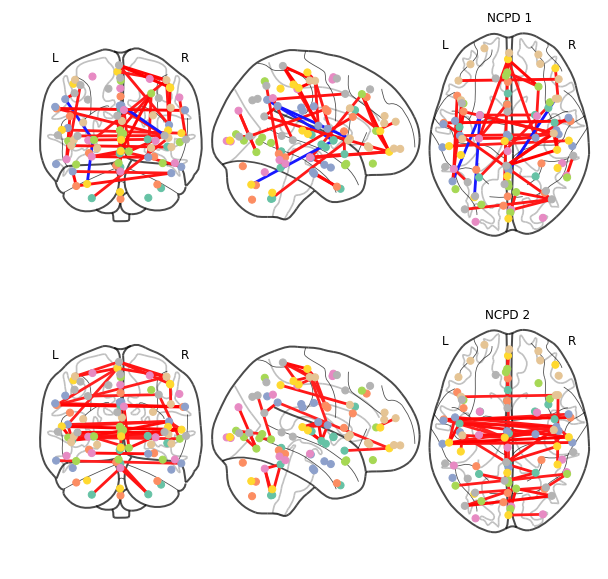

In [25]:
from nilearn.plotting import plot_connectome

fig = plt.figure(figsize=(10,10))

ax = plt.subplot(2,1,1)
plot_connectome(cor1,node_coords=coords_connectome,figure=fig,axes=ax,edge_threshold = '99%')
plt.title('NCPD 1')


ax = plt.subplot(2,1,2)
plot_connectome(cor2,node_coords=coords_connectome,figure=fig,axes=ax,edge_threshold = '99%')
plt.title('NCPD 2 ')

Text(0.5,1,'Cluster 2 ')

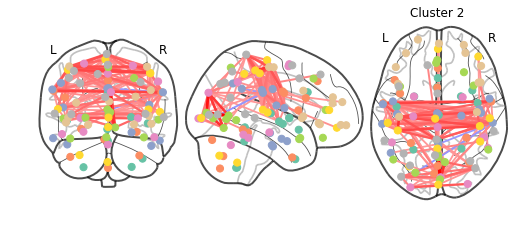

In [30]:
plot_connectome(centroids[2],node_coords=coords_connectome,edge_threshold = '97%')
plt.title('Cluster 2 ')

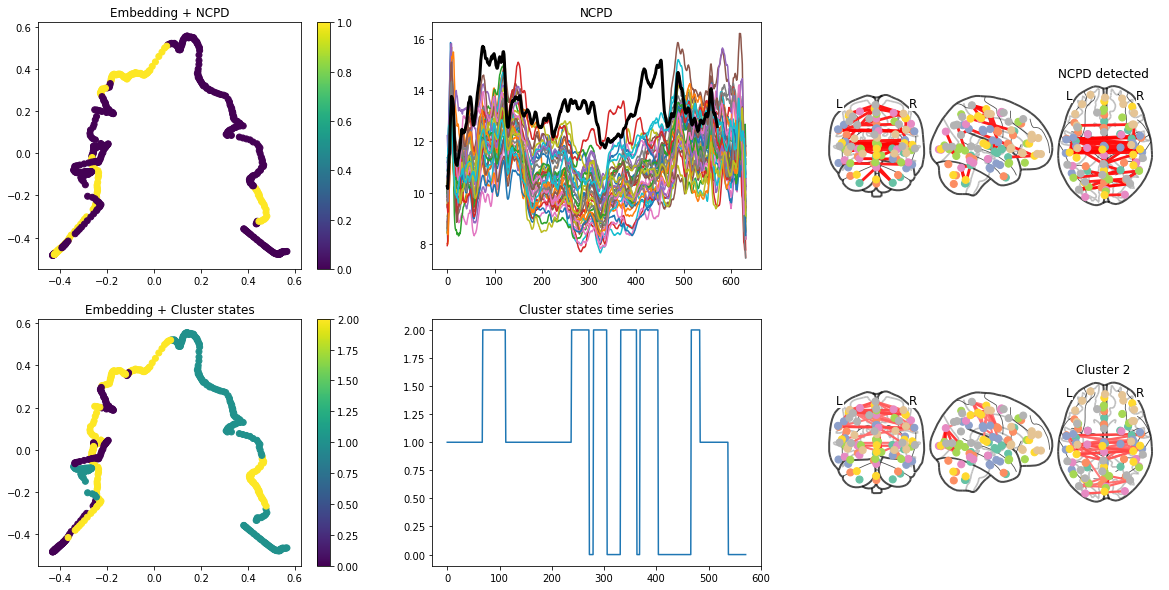

In [35]:
subj = 0

stat = np.load(os.path.join(datapath,"NCPD_results.npz"))['stat']
perms = np.load(os.path.join(datapath,"NCPD_results.npz"))['permuts']

maxofperms = np.max(perms,axis=0)

stat_ncpd = stat[:,:572]

#stat_ncpd[stat_ncpd>=14] = 1
#stat_ncpd[stat_ncpd<14] = 0

fig = plt.figure(figsize=(20,10))
plt.subplot(2,3,1)
plt.scatter(lowdim_fc[subj,:,0],lowdim_fc[subj,:,1],c=stat_ncpd.ravel()>maxofperms[:572])
plt.colorbar()
plt.title('Embedding + NCPD')
plt.subplot(2,3,2)
plt.plot(perms[:40,:].T)
plt.plot(stat_ncpd.ravel(), color='k', linewidth=3)
plt.title('NCPD')
plt.subplot(2,3,4)
plt.scatter(lowdim_fc[subj,:,0],lowdim_fc[subj,:,1],c=clustlabels[subj])
plt.colorbar()
plt.title('Embedding + Cluster states')
plt.subplot(2,3,5)
plt.plot(clustlabels[subj])
plt.title('Cluster states time series')

ax = plt.subplot(2,3,3)
plot_connectome(cor2,node_coords=coords_connectome,figure=fig,axes=ax,edge_threshold = '99%')
plt.title('NCPD detected ')

ax = plt.subplot(2,3,6)
plot_connectome(centroids[2],figure=fig,axes=ax, node_coords=coords_connectome,edge_threshold = '99%')
plt.title('Cluster 2 ')

plt.show()